## https://yunwoong.tistory.com/148
1. 위 링크 들어가서 '1. Google Cloud Vision API 키 발급' 받기
2. 아래코드에 api키 입력하기
3. 아래코드에 이미지파일 경로 설정하기 

In [ ]:
!pip install opencv-contrib-python
!pip install --upgrade google-cloud-vision
!pip install matplotlib

In [1]:
import os
import io
import numpy as npgo
import platform
from PIL import ImageFont, ImageDraw, Image
import cv2
from google.cloud import vision

ModuleNotFoundError: No module named 'numpy'

In [2]:
import matplotlib.pyplot as plt
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

In [3]:
def putText(image, text, x, y, color=(0, 255, 0), font_size=22):
    if type(image) == np.ndarray:
        color_coverted = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = Image.fromarray(color_coverted)
 
    if platform.system() == 'Darwin':
        font = 'AppleGothic.ttf'
    elif platform.system() == 'Windows':
        font = 'malgun.ttf'
    else:
        font = 'NanumGothic.ttf'
        
    image_font = ImageFont.truetype(font, font_size)
    font = ImageFont.load_default()
    draw = ImageDraw.Draw(image)
 
    draw.text((x, y), text, font=image_font, fill=color)
    
    numpy_image = np.array(image)
    opencv_image = cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR)
 
    return opencv_image

In [4]:
############API설정#####################
########################################
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'XXXXXXXXXXXXXXX.json' #json으로 발급받은 API키 입력 


client_options = {'api_endpoint': 'eu-vision.googleapis.com'}
client = vision.ImageAnnotatorClient(client_options=client_options)

In [5]:
#######################이미지파일 경로설정###############################
#######################################################################
path = 'test3.png' 
print(path)
with io.open(path, 'rb') as image_file:
    content = image_file.read()

test3.png


In [6]:
image = vision.Image(content=content)

response = client.text_detection(image=image)
texts = response.text_annotations


""과연 한글 파일도 인식할까?"
("이런 특수문자들 말이야. 예를 들어, %,나) 같은거"

"""

"과연"

"한글"

"파일"

"도"

"인식"

"할까"

"?"

"""

"("

"""

"이런"

"특수"

"문자"

"들"

"말이야"

"."

"예"

"를"

"들어"

","

"%"

","

"나"

")"

"같은"

"거"


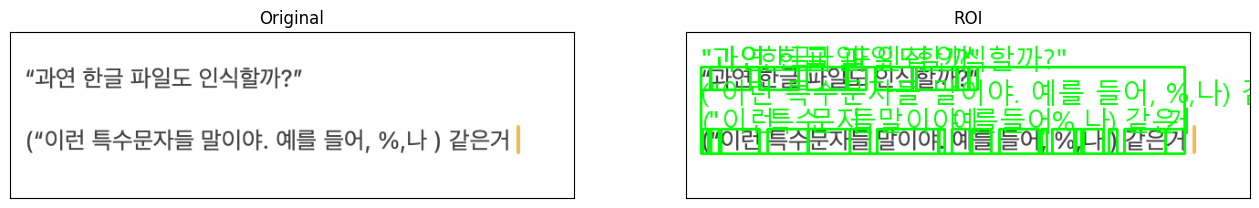

In [7]:
img = cv2.imread(path)

roi_img = img.copy()
    
for text in texts:
    print('\n"{}"'.format(text.description))
 
    vertices = (['({},{})'.format(vertex.x, vertex.y)
                for vertex in text.bounding_poly.vertices])
    
    ocr_text = text.description
    x1 = text.bounding_poly.vertices[0].x
    y1 = text.bounding_poly.vertices[0].y
    x2 = text.bounding_poly.vertices[1].x
    y2 = text.bounding_poly.vertices[2].y
    
    cv2.rectangle(roi_img, (int(x1), int(y1)), (int(x2), int(y2)), (0,255,0), 2)
    roi_img = putText(roi_img, ocr_text, x1, y1 - 30, font_size=30)
 
if response.error.message:
    raise Exception(
        '{}\nFor more info on error messages, check: '
        'https://cloud.google.com/apis/design/errors'.format(
            response.error.message))
    
plt_imshow(["Original", "ROI"], [img, roi_img], figsize=(16, 10))